# compare BNB and EXTBNB data to MC-BNB/DATA cosmic overlay 

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from matplotlib.pylab import *
import matplotlib.patches as patches
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


# import data

In [2]:
debug = 1
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/BNBextBNBvsOverlay/'

In [ ]:
Nevents

{'MC-BNB/Cosmic-DATA overlay': 96350,
 'MC-BNB/Cosmic-DATA overlay POT': 9.773e+19,
 'MC-BNB/Cosmic-MC overlay': 358800,
 'MC-BNB/Cosmic-MC overlay POT': 3.61901e+20,
 'OffBeam after sof.trig.': 380602,
 'OffBeam before sof.trig.': 8529852.084267145,
 'OffBeam sof.trig. efficiency': 0.04462,
 'OnBeam POT': 4.93e+19,
 'OnBeam after sof.trig.': 544114,
 'OnBeam before sof.trig.': 10596183.05744888,
 'OnBeam sof.trig. efficiency': 0.05135,
 'v04 after sof.trig.': 378787,
 'v05 after sof.trig.': 1815}

## (1) Off-Beam from two samples
the infamous "inconsistent process history" issue
separate the list into two lists 
corresponding to files that were swizzled using v04_26_04_% and v05_08_00_%

In [ ]:
OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v04_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v05_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print len(OffBeam),'pairs from Off-Beam'
print len(OffBeamFV),'pairs from Off-Beam in FV'

## (2) On-Beam sample

In [ ]:
OnBeam = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_bnb_v8_mcc8_vertices.csv')
OnBeamFV = sample_in_FV(OnBeam)
print len(OnBeam),'pairs from On-Beam'
print len(OnBeamFV),'pairs from On-Beam in FV'

## (3) MC-BNB + Cosmic DATA overlay 

In [ ]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

In [ ]:
reduced_OffBeam = dict()
reduced_OnBeam = dict()

reduced_OffBeam['no cut'] = OffBeamFV
reduced_OnBeam['no cut'] = OnBeamFV

# cut 3: |\theta_{1,2}-90^0|<60^0$
theta_12_cut = 60
sam = reduced_OffBeam['no cut']
reduced_OffBeam['non-collinearity first'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['non-collinearity first'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]



# cut 1: PIDa
PIDaCut = 12
sam = reduced_OffBeam['no cut']
reduced_OffBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]


# cut 2: require that the longer track is the one with larger PIDa
sam = reduced_OffBeam['PIDa']
reduced_OffBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]
sam = reduced_OnBeam['PIDa']
reduced_OnBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]


# cut 3: |\theta_{1,2}-90^0|<60^0$
theta_12_cut = 60
sam = reduced_OffBeam['length']
reduced_OffBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['length']
reduced_OnBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]


# cut 4: vertex activity
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru = 'RdQaroundVertex[plane 0]'+box_str
Rv = 'RdQaroundVertex[plane 1]'+box_str
Ry = 'RdQaroundVertex[plane 2]'+box_str    
r_max_RdQ_CC1p0pi = 0.33
sam = reduced_OffBeam['non-collinearity']
reduced_OffBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
sam = reduced_OnBeam['non-collinearity']
reduced_OnBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]


# cut 5: \Delta \phi
delta_Delta_phi = 40
sam = reduced_OffBeam['vertex activity']
reduced_OffBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
sam = reduced_OnBeam['vertex activity']
reduced_OnBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]


# modified cut 6: $p_{t}<0.35$
Pt_max = 0.35
sam = reduced_OffBeam['delta phi']
reduced_OffBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]
sam = reduced_OnBeam['delta phi']
reduced_OnBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]

# cut on l_p>10 cm
sam = reduced_OffBeam['soft Pt']
reduced_OffBeam['l_p_min_10'] = sam[sam['l_assigned_proton']>10]
sam = reduced_OnBeam['soft Pt']
reduced_OnBeam['l_p_min_10'] = sam[sam['l_assigned_proton']>10]

# lets get to buissiness

In [ ]:
#     draw_var(cut_name='soft Pt',var='reco_Q2',x_label='$Q^2$ (GeV/c)$^2$',bins=np.linspace(0.0,1.0,25)
#              ,reduced_OnBeam=reduced_OnBeam
#              ,reduced_OffBeam=reduced_OffBeam,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
#              ,do_cosmic_only=False
#              ,do_bnb_only=True
#              ,chi2_xrange=(0,1),chi2_xy=(0.6,50)
#              ,debug=2,do_save_fig=True)
draw_var(cut_name='soft Pt',var='l_assigned_proton',x_label='$l^p$ [cm]'         
         ,OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV
         ,bins=np.linspace(0,100,41)
         ,chi2_xrange=(0,100),chi2_xy=(20,50)
         ,reduced_OnBeam=reduced_OnBeam
         ,reduced_OffBeam=reduced_OffBeam
         ,reduced_MCbnbDATAcosmicSamples=reduced_MCbnbDATAcosmicSamples
         ,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
         ,do_cosmic_only=False,do_bnb_only=True         
         ,debug=2,do_save_fig=True,figures_path=figures_path)    

In [ ]:
cut_name = 'soft Pt' # 'no cut','non-collinearity first',
observables = ['l_assigned_muon','l_assigned_proton','PIDa_assigned_proton','PIDa_assigned_muon','theta_12','delta_phi','reco_Pt','reco_Q2']
x_labels = [r'$l_{\mu}$ [cm]',r'$l_{p}$ [cm]',r'$PID_a^{p}$',r'$PID_a^{\mu}$',r'$\theta^{12}$ [deg.]',r'$\Delta \phi$ [deg.]','$p_{t}$ [GeV/c]','$Q^2$ (GeV/c)$^2$']
x_bins = [np.linspace(0,210,31),np.linspace(0,100,41),np.linspace(0,40,41),np.linspace(0,40,41),np.linspace(0,180,31),np.linspace(0,360,73),np.linspace(0.0,0.7,21),np.linspace(0.0,1.0,25)]
chi2_xranges = [(0,210),(0,70),(12,40),(0,20),(30,150),(140,220),(0,0.4),(0,1)]
chi2_xy_text = [(100,30),(20,60),(25,40),(10,60),(30,35),(220,70),(0.4,50),(0.6,50)]
for var,x_label,bins,chi2_xrange,chi2_xy in zip(observables
                                                 ,x_labels
                                                 ,x_bins
                                                 ,chi2_xranges
                                                 ,chi2_xy_text):
    draw_var(cut_name=cut_name,var=var,x_label=x_label,bins=bins
             ,OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV
             ,reduced_OnBeam=reduced_OnBeam
             ,reduced_OffBeam=reduced_OffBeam
             ,reduced_MCbnbDATAcosmicSamples=reduced_MCbnbDATAcosmicSamples
             ,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
             ,do_cosmic_only=False
             ,do_bnb_only=True
             ,chi2_xrange=chi2_xrange,chi2_xy=chi2_xy
             ,debug=0,do_save_fig=True,figures_path=figures_path)

# 2D

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/BNBextBNBvsOverlay/l_assigned_proton_vs_PIDa_assigned_proton_after_cut_soft Pt.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/BNBextBNBvsOverlay/l_assigned_proton_vs_PIDa_assigned_proton_after_cut_soft Pt_zoomin_.pdf


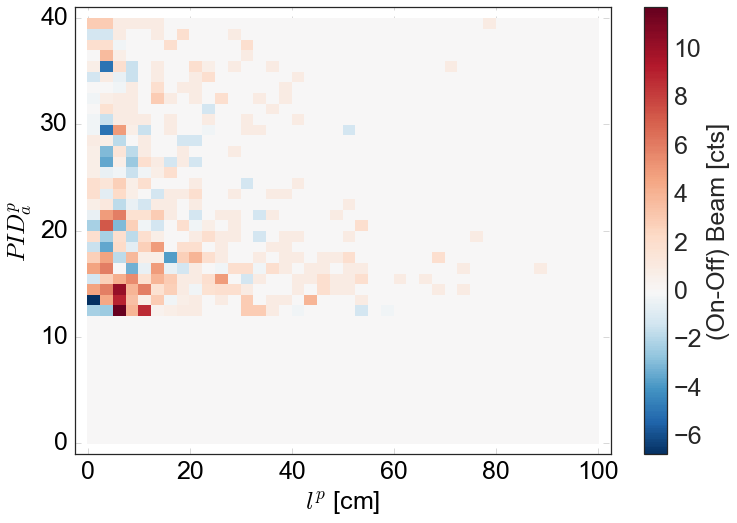

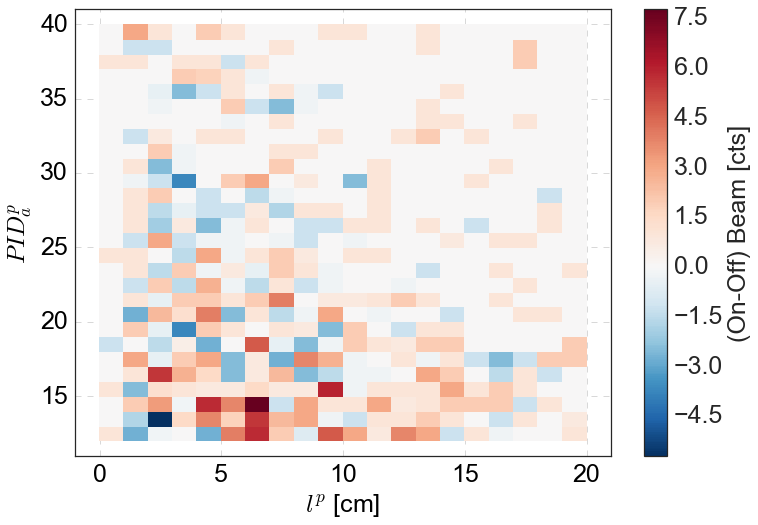

In [12]:
cut_name = 'soft Pt'
varx='l_assigned_proton'
x_label=r'$l^{p}$ [cm]'
vary='PIDa_assigned_proton'
y_label=r'$PID_a^{p}$'
OnBeam_minus_OffBeam_2d( OnBeamSample=reduced_OnBeam[cut_name] , OffBeamSample=reduced_OffBeam[cut_name]
                        , debug=0                        
                        , varx=varx , x_label=x_label
                        , vary=vary , y_label=y_label
                        , bins=(np.linspace(0,100,41),np.linspace(0,40,41)), cmap='RdBu_r'
                        )
filename = figures_path+varx+"_vs_"+vary+'_'+'after_cut_'+cut_name+'.pdf'
print 'saved', filename
plt.savefig(filename)

OnBeam_minus_OffBeam_2d( OnBeamSample=reduced_OnBeam[cut_name] , OffBeamSample=reduced_OffBeam[cut_name]
                        , debug=0                        
                        , varx=varx , x_label=x_label
                        , vary=vary , y_label=y_label
                        , bins=(np.linspace(0,20,21),np.linspace(12,40,29)), cmap='RdBu_r'
                        )
filename = figures_path+varx+"_vs_"+vary+'_'+'after_cut_'+cut_name+'_zoomin_'+'.pdf'
print 'saved', filename
plt.savefig(filename)

# after a cut on $l_p>10$ cm

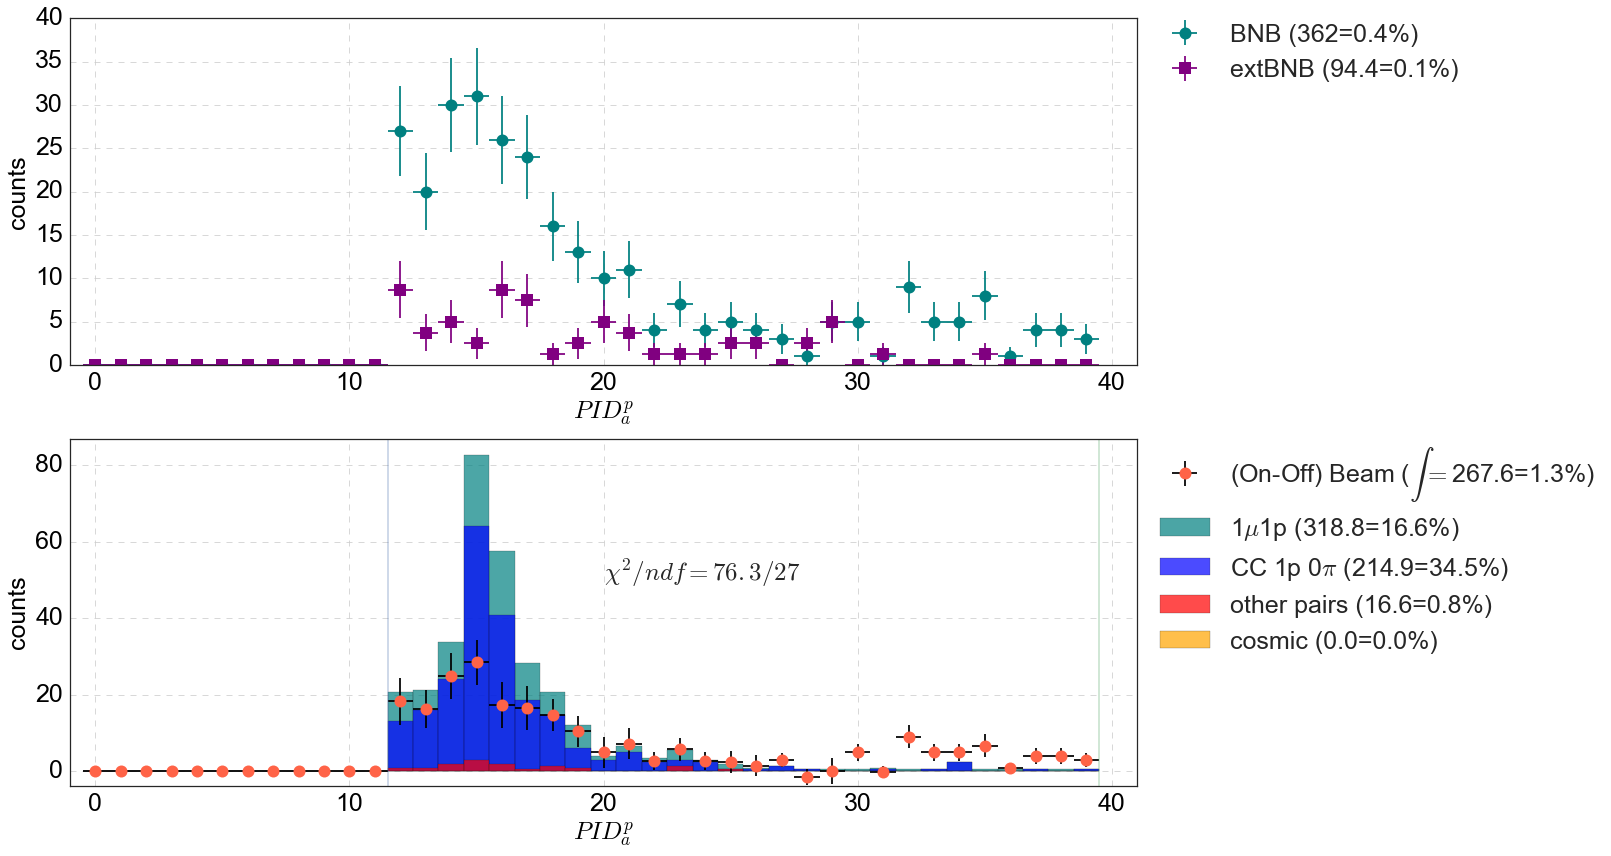

In [14]:
draw_var(cut_name='l_p_min_10',var='PIDa_assigned_proton',x_label=r'$PID_a^p$'
         ,bins=np.linspace(0,40,41)
         ,chi2_xrange=(12,40),chi2_xy=(20,50)
             ,OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV
             ,reduced_OnBeam=reduced_OnBeam
             ,reduced_OffBeam=reduced_OffBeam
             ,reduced_MCbnbDATAcosmicSamples=reduced_MCbnbDATAcosmicSamples
             ,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
             ,do_cosmic_only=False
             ,do_bnb_only=True
         ,debug=0,do_save_fig=True,figures_path=figures_path)    

# before kinematical cuts

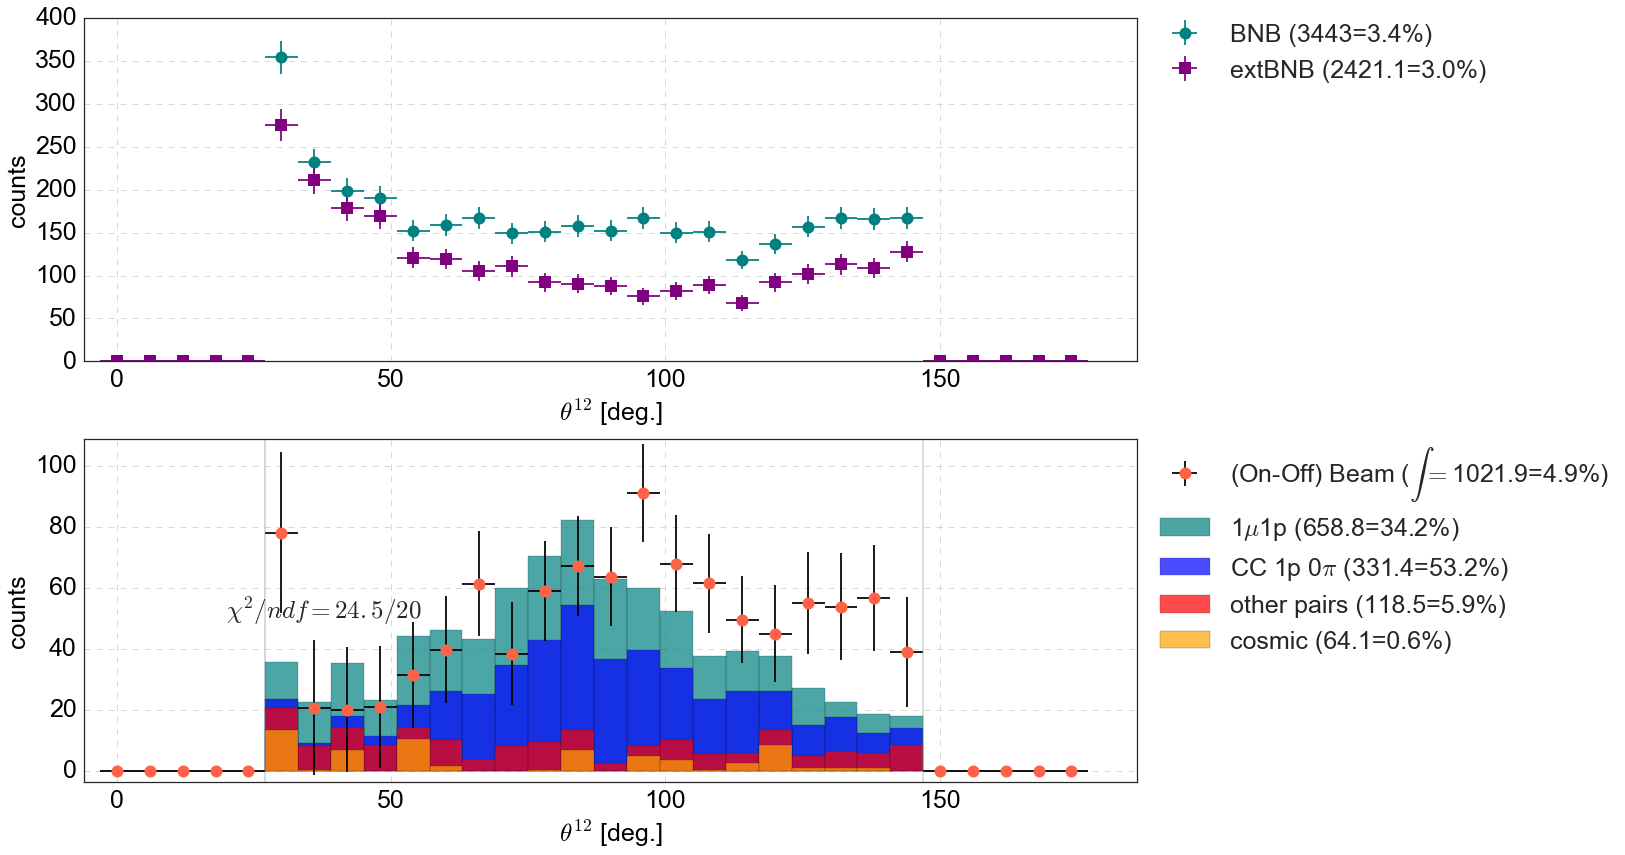

In [15]:
draw_var(cut_name='vertex activity',var='theta_12',x_label=r'$\theta^{12}$ [deg.]'
         ,bins=np.linspace(0,180,31)
         ,chi2_xrange=(30,150),chi2_xy=(20,50)
               ,OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV
             ,reduced_OnBeam=reduced_OnBeam
             ,reduced_OffBeam=reduced_OffBeam
             ,reduced_MCbnbDATAcosmicSamples=reduced_MCbnbDATAcosmicSamples
             ,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
             ,do_cosmic_only=False
             ,do_bnb_only=True
         ,debug=0,do_save_fig=True,figures_path=figures_path)    